# Modelo de regressão para uma fução conhecida em TensorFlow.Keras

### Nesse exemplo, vamos construir um modelo de predição para uma função matemática conhecida, de modo que possamos predizer um, ou mais, valores, a partir dos N valores anteriores dessa função. Utilizaremos para isso a função seno, e usaremos o conjunto TensorFlow keras para simplificar o processo de implementação desse exemplo.

## Inicialmente vamos inserir algumas bibliotecas no nosso projeto

In [ ]:
#importantdo as bibliotecas necessárias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## O Segundo passo é criar a base de dados necessária para o desenvolvimento do problema

#### Os Dados precisam ser organizados de modo que a entrada e a saida da rede representem a dinâmica do problema.

In [ ]:
def ProcessData(dado, intervalo_informacao, tamanho_predicao):
  '''
  dado = Conjunto de amostras usadas para o treinamento da rede
  intervalo_informação = Corresponde a quantidade de amostras que serão usadas para predição
  tamanho_predição = Corresponde a quantidade de amostras a serem preditas
  '''
  aux_a=np.zeros([len(dado)-(intervalo_informacao+tamanho_predicao),intervalo_informacao])
  aux_b=np.zeros([len(dado)-(intervalo_informacao+tamanho_predicao),tamanho_predicao])

  for i in range(len(dado)-(intervalo_informacao+tamanho_predicao)):
    aux_a[i] = dado[i:(i+intervalo_informacao)]
    aux_b[i] = dado[(i+intervalo_informacao):((i+intervalo_informacao)+tamanho_predicao)]

  return [aux_a,aux_b]

#### Vamos definir algumas variáveis auxiliares e o conjunto de de dados de entrada e saída do problema, para treinamento e teste.

In [ ]:
#criando o conjunto de dados para ser usados
freq = 60
num_periodos = 15

x1=np.linspace(0,num_periodos/freq,1000)
y1=(np.sin(2*np.pi*freq*x1)+1)/2
x2=x1[0:200]
y2=(np.sin(2*np.pi*freq*x2)+1)/2


(90, 10)


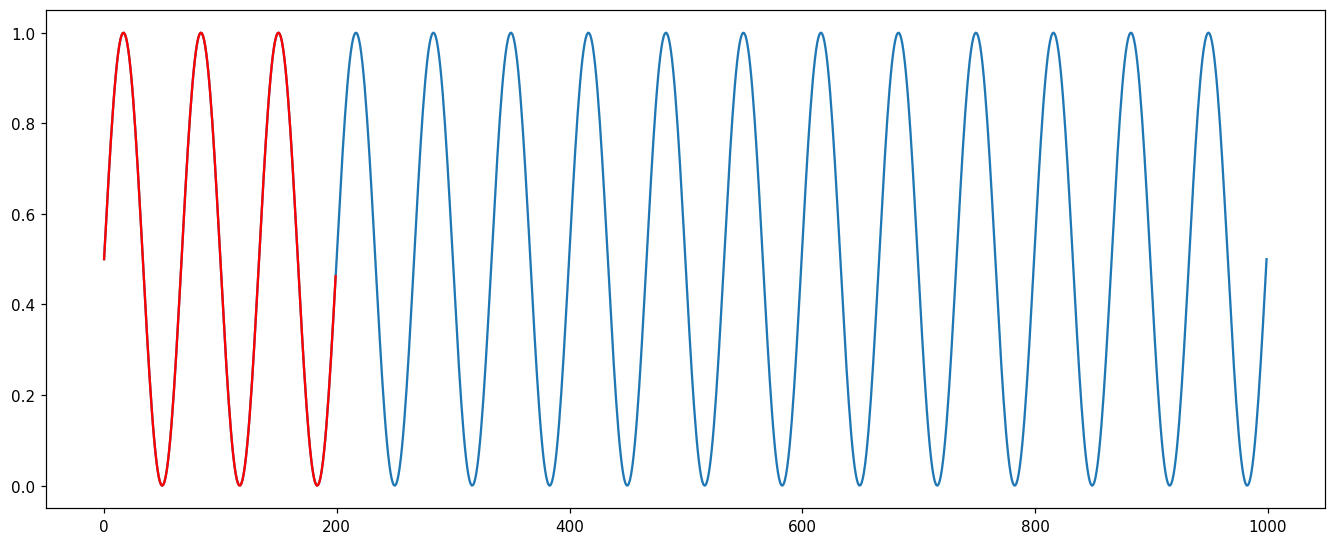

<tf.Tensor: shape=(890, 10), dtype=float64, numpy=
array([[0.49528296, 0.44820492, 0.40158753, ..., 0.189574  , 0.15403057,
        0.12156412],
       [0.44820492, 0.40158753, 0.3558454 , ..., 0.15403057, 0.12156412,
        0.09246343],
       [0.40158753, 0.3558454 , 0.31138537, ..., 0.12156412, 0.09246343,
        0.0669873 ],
       ...,
       [0.04734575, 0.06936509, 0.09521442, ..., 0.27279463, 0.3157623 ,
        0.36036856],
       [0.06936509, 0.09521442, 0.12466385, ..., 0.3157623 , 0.36036856,
        0.40621667],
       [0.09521442, 0.12466385, 0.15745145, ..., 0.36036856, 0.40621667,
        0.45289888]])>

In [ ]:
[entrada_train, saida_train] = ProcessData(y1, 100, 10)
[entrada_test, saida_test] = ProcessData(y2, 100, 10)
print(saida_test.shape)

plt.figure(figsize=(15,6),dpi=110)
plt.plot(y1)
plt.plot(y2,'r')
plt.show()

entrada_train = tf.convert_to_tensor(entrada_train)
saida_train = tf.convert_to_tensor(saida_train)
entrada_test = tf.convert_to_tensor(entrada_test)
saida_test = tf.convert_to_tensor(saida_test)
#print(entrada_train.shape)
#print(saida_train.shape)
saida_train

### Uma vez criada a base de dados, vamos construir um modelo para regressão dos dados baseado em RNAs.

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(100,)),  # input layer (1)
    keras.layers.Dense(20, activation='relu'),  # hidden layer (1)
    keras.layers.Dense(10, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='relu') # output layer
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.summary()

# O treinamento da rede é realizado usando o módulo fit e recebe como um dos 
# parâmetros a quantidade de iterações desejadas de minimização do erro.
model.fit(entrada_train, saida_train, shuffle=True, epochs=100)



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
Total params: 2,340
Trainable params: 2,340
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2298 - accuracy: 0.0292
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.2235
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.2363
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1108 - acc

### Uma vez treinada essa rede pode ser testada para avaliação de seu desempenho

In [ ]:
test_loss, test_acc = model.evaluate(entrada_test,  saida_test, verbose=1) 

print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9778
Test accuracy: 0.9777777791023254


### Considerando o problema proposto devemos separar os dados para o treinamento de acordo com as restrições impostas no problema. Vamos usar um conjunto com 100 amostras de entrada para predizer as proximas 10 amostras de saída do sistema.

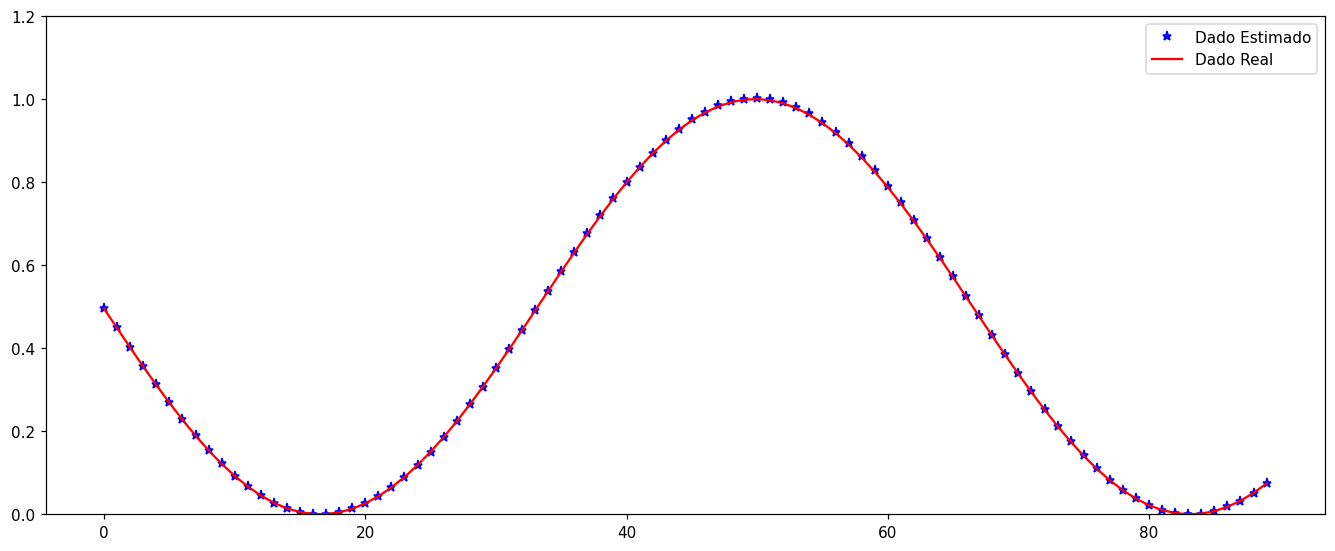

In [ ]:
predictions = model.predict(entrada_test)

plt.figure(figsize=(15,6),dpi=110)
plt.plot(predictions[:,0],'*b')
plt.plot(saida_test[:,0],'r')
plt.ylim([0,1.2])
plt.legend(['Dado Estimado','Dado Real'])
plt.show() 